# ü¶æ Pivot from long to wide format

> Demonstrates the following:
> 
> - Different Polars pivot manuevers to change long form to wide form DataFrames.

Data is returned as a long format, dataframe. This means there is one unique observation (air temperature, humidity, wind speed, etc.) per row. It's often useful to pivot variables into columns. This can be done with Polars. I encourage users of SynopticPy to become familiar with Polars for DataFrame manipulation.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

import synoptic

In [2]:
s = synoptic.Latest(stid="ukbkb,wbb", vars="air_temp,dew_point_temperature")
df = s.df()
df

üööüí® Speedy delivery from Synoptic's latest service.
üì¶ Received data from 2 stations (0.15 seconds).


shape: (4, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid  ‚îÜ variable   ‚îÜ sensor_ind ‚îÜ is_derived ‚îÜ ‚Ä¶ ‚îÜ period_of ‚îÜ qc_flagge ‚îÜ is_restri ‚îÜ is_active ‚îÇ
‚îÇ ---   ‚îÜ ---        ‚îÜ ex         ‚îÜ ---        ‚îÜ   ‚îÜ _record_e ‚îÜ d         ‚îÜ cted      ‚îÜ ---       ‚îÇ
‚îÇ str   ‚îÜ str        ‚îÜ ---        ‚îÜ bool       ‚îÜ   ‚îÜ nd        ‚îÜ ---       ‚îÜ ---       ‚îÜ bool      ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ u32        ‚îÜ            ‚îÜ   ‚îÜ ---       ‚îÜ bool      ‚îÜ bool      ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ datetime[ ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ Œºs, UTC]  ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ WBB   ‚îÜ air_temp   ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-0 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 3         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00  ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ UKBKB ‚îÜ air_temp   ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-0 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 3         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:00:00  ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB   ‚îÜ dew_point_ ‚îÜ 1          ‚îÜ true       ‚îÜ ‚Ä¶ ‚îÜ 2024-12-0 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ       ‚îÜ temperatur ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 3         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ e          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00  ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ UKBKB ‚îÜ dew_point_ ‚îÜ 1          ‚îÜ true       ‚îÜ ‚Ä¶ ‚îÜ 2024-12-0 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ       ‚îÜ temperatur ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 3         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ e          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:00:00  ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ       ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

SynopticPy provides a basic pivot method that likely gets the job done in most cases.

In [3]:
df.synoptic.pivot()

shape: (2, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ date_time           ‚îÜ stid  ‚îÜ latitude ‚îÜ longitude  ‚îÜ elevation ‚îÜ air_temp ‚îÜ dew_point_temperatu ‚îÇ
‚îÇ ---                 ‚îÜ ---   ‚îÜ ---      ‚îÜ ---        ‚îÜ ---       ‚îÜ ---      ‚îÜ re                  ‚îÇ
‚îÇ datetime[Œºs, UTC]   ‚îÜ str   ‚îÜ f64      ‚îÜ f64        ‚îÜ f64       ‚îÜ f64      ‚îÜ ---                 ‚îÇ
‚îÇ                     ‚îÜ       ‚îÜ          ‚îÜ            ‚îÜ           ‚îÜ          ‚îÜ f64                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2024-12-03 05:30:00 ‚îÜ WBB   ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.972    ‚îÜ -3.49               ‚îÇ
‚îÇ UTC                 ‚îÜ       ‚îÜ          ‚îÜ            ‚îÜ           ‚îÜ          ‚îÜ                     ‚îÇ
‚îÇ 2024-12-03 05:30:00 ‚îÜ UKBKB ‚îÜ 40.09867 ‚îÜ -111.62767 ‚îÜ 4734.0    ‚îÜ 0.0      ‚îÜ -3.6                ‚îÇ
‚îÇ UTC                 ‚îÜ       ‚îÜ          ‚îÜ            ‚îÜ           ‚îÜ          ‚îÜ                     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

With a pivotted DataFrame, you can use the `with_wind_uv` method.

In [4]:
synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_speed", recent="12h").df()

üööüí® Speedy delivery from Synoptic's timeseries service.
üì¶ Received data from 1 stations (0.16 seconds).


shape: (713, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ date_time  ‚îÜ variable   ‚îÜ sensor_ind ‚îÜ ‚Ä¶ ‚îÜ period_of_ ‚îÜ qc_flagge ‚îÜ is_restri ‚îÜ is_active ‚îÇ
‚îÇ ---  ‚îÜ ---        ‚îÜ ---        ‚îÜ ex         ‚îÜ   ‚îÜ record_end ‚îÜ d         ‚îÜ cted      ‚îÜ ---       ‚îÇ
‚îÇ str  ‚îÜ datetime[Œº ‚îÜ str        ‚îÜ ---        ‚îÜ   ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ bool      ‚îÇ
‚îÇ      ‚îÜ s, UTC]    ‚îÜ            ‚îÜ u32        ‚îÜ   ‚îÜ datetime[Œº ‚îÜ bool      ‚îÜ bool      ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ s, UTC]    ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ WBB  ‚îÜ 2024-12-02 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 17:39:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-02 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 17:40:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-02 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 17:41:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-02 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 17:42:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-02 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 17:43:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶    ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-03 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 05:27:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-03 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ 05:28:00   ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:05:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ UTC        ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ WBB  ‚îÜ 2024-12-03 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚

In [5]:
df = (
    synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_direction", recent="12h")
    .df()
    .synoptic.pivot()
    .synoptic.with_wind_uv()
)
df

üööüí® Speedy delivery from Synoptic's timeseries service.
üì¶ Received data from 1 stations (0.18 seconds).


shape: (713, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ date_time   ‚îÜ stid ‚îÜ latitude ‚îÜ longitude  ‚îÜ ‚Ä¶ ‚îÜ wind_speed ‚îÜ wind_direct ‚îÜ wind_u   ‚îÜ wind_v    ‚îÇ
‚îÇ ---         ‚îÜ ---  ‚îÜ ---      ‚îÜ ---        ‚îÜ   ‚îÜ ---        ‚îÜ ion         ‚îÜ ---      ‚îÜ ---       ‚îÇ
‚îÇ datetime[Œºs ‚îÜ str  ‚îÜ f64      ‚îÜ f64        ‚îÜ   ‚îÜ f64        ‚îÜ ---         ‚îÜ f64      ‚îÜ f64       ‚îÇ
‚îÇ , UTC]      ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ f64         ‚îÜ          ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2024-12-02  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.962      ‚îÜ 262.2       ‚îÜ 0.953099 ‚îÜ 0.130558  ‚îÇ
‚îÇ 17:39:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-02  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.561      ‚îÜ 304.1       ‚îÜ 0.464542 ‚îÜ -0.314518 ‚îÇ
‚îÇ 17:40:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-02  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.386      ‚îÜ 343.8       ‚îÜ 0.107691 ‚îÜ -0.370673 ‚îÇ
‚îÇ 17:41:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-02  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.427      ‚îÜ 301.7       ‚îÜ 0.363296 ‚îÜ -0.224376 ‚îÇ
‚îÇ 17:42:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-02  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.571      ‚îÜ 270.4       ‚îÜ 0.570986 ‚îÜ -0.003986 ‚îÇ
‚îÇ 17:43:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 2024-12-03  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.509      ‚îÜ 204.9       ‚îÜ 0.214307 ‚îÜ 0.461685  ‚îÇ
‚îÇ 05:27:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-03  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.458      ‚îÜ 218.4       ‚îÜ 0.284486 ‚îÜ 0.358932  ‚îÇ
‚îÇ 05:28:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ UTC         ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ             ‚îÜ          ‚îÜ           ‚îÇ
‚îÇ 2024-12-03  ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ ‚Ä¶ ‚îÜ 0.319      ‚îÜ 216.9       ‚îÜ 0.191534 ‚îÜ 0.255099  ‚îÇ
‚îÇ 05:29:00    ‚îÜ      ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ 

## Customized pivots

In [6]:
df = synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_speed", recent="12h").df()

df.pivot(
    on="variable",
    index=["date_time", "stid", "latitude", "longitude", "elevation"],
    values="value",
)

üööüí® Speedy delivery from Synoptic's timeseries service.
üì¶ Received data from 1 stations (0.17 seconds).


shape: (713, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ date_time               ‚îÜ stid ‚îÜ latitude ‚îÜ longitude  ‚îÜ elevation ‚îÜ wind_speed ‚îÇ
‚îÇ ---                     ‚îÜ ---  ‚îÜ ---      ‚îÜ ---        ‚îÜ ---       ‚îÜ ---        ‚îÇ
‚îÇ datetime[Œºs, UTC]       ‚îÜ str  ‚îÜ f64      ‚îÜ f64        ‚îÜ f64       ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2024-12-02 17:39:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.962      ‚îÇ
‚îÇ 2024-12-02 17:40:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.561      ‚îÇ
‚îÇ 2024-12-02 17:41:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.386      ‚îÇ
‚îÇ 2024-12-02 17:42:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.427      ‚îÇ
‚îÇ 2024-12-02 17:43:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.571      ‚îÇ
‚îÇ ‚Ä¶                       ‚îÜ ‚Ä¶    ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ 2024-12-03 05:27:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.509      ‚îÇ
‚îÇ 2024-12-03 05:28:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.458      ‚îÇ
‚îÇ 2024-12-03 05:29:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.319      ‚îÇ
‚îÇ 2024-12-03 05:30:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ 0.0        ‚îÇ
‚îÇ 2024-12-03 05:35:00 UTC ‚îÜ WBB  ‚îÜ 40.76623 ‚îÜ -111.84755 ‚îÜ 4806.0    ‚îÜ null       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## Special Case: Multiple Sensors

If your set of stations has multiple sensors the measure the same variable (e.g., NAA measures outdoor air temperature and greenhouse air temperature) you will need to take care with how you perform your pivot. Either filter the rows for a single sensor ID, or pivot on both the variable _and_ sensor columns.

In [7]:
# Notice that NAA has two different reports for air temperature
df = synoptic.Latest(stid="naa", vars="air_temp,wind_speed").df()
df

üööüí® Speedy delivery from Synoptic's latest service.
üì¶ Received data from 1 stations (0.15 seconds).


shape: (3, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ variable   ‚îÜ sensor_ind ‚îÜ is_derived ‚îÜ ‚Ä¶ ‚îÜ period_of_ ‚îÜ qc_flagge ‚îÜ is_restri ‚îÜ is_active ‚îÇ
‚îÇ ---  ‚îÜ ---        ‚îÜ ex         ‚îÜ ---        ‚îÜ   ‚îÜ record_end ‚îÜ d         ‚îÜ cted      ‚îÜ ---       ‚îÇ
‚îÇ str  ‚îÜ str        ‚îÜ ---        ‚îÜ bool       ‚îÜ   ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ bool      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ u32        ‚îÜ            ‚îÜ   ‚îÜ datetime[Œº ‚îÜ bool      ‚îÜ bool      ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ s, UTC]    ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ NAA  ‚îÜ air_temp   ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:00:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ NAA  ‚îÜ air_temp   ‚îÜ 2          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:00:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ NAA  ‚îÜ wind_speed ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 05:00:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [8]:
# Filter sensor ID, then pivot
df.filter(sensor_index=1).pivot(
    "variable", index=["stid", "date_time", "latitude", "longitude"], values="value"
)

shape: (1, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ date_time               ‚îÜ latitude ‚îÜ longitude  ‚îÜ air_temp ‚îÜ wind_speed ‚îÇ
‚îÇ ---  ‚îÜ ---                     ‚îÜ ---      ‚îÜ ---        ‚îÜ ---      ‚îÜ ---        ‚îÇ
‚îÇ str  ‚îÜ datetime[Œºs, UTC]       ‚îÜ f64      ‚îÜ f64        ‚îÜ f64      ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ NAA  ‚îÜ 2024-12-03 05:30:00 UTC ‚îÜ 40.71152 ‚îÜ -112.01448 ‚îÜ -2.017   ‚îÜ 0.19       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [9]:
# Pivot on both variable and sensor column
df.pivot(
    ["variable", "sensor_index"],
    index=["stid", "date_time", "latitude", "longitude"],
    values="value",
)

shape: (1, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ date_time      ‚îÜ latitude ‚îÜ longitude  ‚îÜ {"air_temp",1} ‚îÜ {"air_temp",2} ‚îÜ {"wind_speed", ‚îÇ
‚îÇ ---  ‚îÜ ---            ‚îÜ ---      ‚îÜ ---        ‚îÜ ---            ‚îÜ ---            ‚îÜ 1}             ‚îÇ
‚îÇ str  ‚îÜ datetime[Œºs,   ‚îÜ f64      ‚îÜ f64        ‚îÜ f64            ‚îÜ f64            ‚îÜ ---            ‚îÇ
‚îÇ      ‚îÜ UTC]           ‚îÜ          ‚îÜ            ‚îÜ                ‚îÜ                ‚îÜ f64            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ NAA  ‚îÜ 2024-12-03     ‚îÜ 40.71152 ‚îÜ -112.01448 ‚îÜ -2.017         ‚îÜ 2.556          ‚îÜ 0.19           ‚îÇ
‚îÇ      ‚îÜ 05:30:00 UTC   ‚îÜ          ‚îÜ            ‚îÜ                ‚îÜ                ‚îÜ                ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [10]:
df.pivot(
    ["variable", "sensor_index"],
    index=["stid", "date_time", "latitude", "longitude"],
    values="value",
).columns


['stid',
 'date_time',
 'latitude',
 'longitude',
 '{"air_temp",1}',
 '{"air_temp",2}',
 '{"wind_speed",1}']

## Special Case: Measured and derived values

Some stations have both measured and derived variables, like dew point temperature. Your pivot options are 
1. Filter to use only the measured value
1. Pivot on both `variable` _and_ `derived` columns.
1. Use an aggregattion function to take **mean** or **first** of the two values.

In [11]:
df = synoptic.Latest(stid="KU69", vars="wind_speed,dew_point_temperature").df()
df

üööüí® Speedy delivery from Synoptic's latest service.
üì¶ Received data from 1 stations (0.23 seconds).


shape: (3, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ variable   ‚îÜ sensor_ind ‚îÜ is_derived ‚îÜ ‚Ä¶ ‚îÜ period_of_ ‚îÜ qc_flagge ‚îÜ is_restri ‚îÜ is_active ‚îÇ
‚îÇ ---  ‚îÜ ---        ‚îÜ ex         ‚îÜ ---        ‚îÜ   ‚îÜ record_end ‚îÜ d         ‚îÜ cted      ‚îÜ ---       ‚îÇ
‚îÇ str  ‚îÜ str        ‚îÜ ---        ‚îÜ bool       ‚îÜ   ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ bool      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ u32        ‚îÜ            ‚îÜ   ‚îÜ datetime[Œº ‚îÜ bool      ‚îÜ bool      ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ s, UTC]    ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ KU69 ‚îÜ dew_point_ ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ temperatur ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 04:35:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ e          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ KU69 ‚îÜ wind_speed ‚îÜ 1          ‚îÜ false      ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 04:35:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ KU69 ‚îÜ dew_point_ ‚îÜ 1          ‚îÜ true       ‚îÜ ‚Ä¶ ‚îÜ 2024-12-03 ‚îÜ false     ‚îÜ false     ‚îÜ true      ‚îÇ
‚îÇ      ‚îÜ temperatur ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ 04:35:00   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ      ‚îÜ e          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ UTC        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [12]:
# Pivot, calculate the mean if more than one value per variable
df.pivot("variable", index="stid", values="value", aggregate_function="mean")

shape: (1, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ dew_point_temperature ‚îÜ wind_speed ‚îÇ
‚îÇ ---  ‚îÜ ---                   ‚îÜ ---        ‚îÇ
‚îÇ str  ‚îÜ f64                   ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ KU69 ‚îÜ -8.045                ‚îÜ 2.572      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [13]:
# Pivot, use the first value if more than one value per variable
df.pivot("variable", index="stid", values="value", aggregate_function="first")

shape: (1, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ dew_point_temperature ‚îÜ wind_speed ‚îÇ
‚îÇ ---  ‚îÜ ---                   ‚îÜ ---        ‚îÇ
‚îÇ str  ‚îÜ f64                   ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ KU69 ‚îÜ -8.0                  ‚îÜ 2.572      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [14]:
# Pivot on both variable and derived columns
df.sort("variable").pivot(
    ["variable", "is_derived"],
    index=["stid", "latitude", "longitude"],
    values="value",
)

shape: (1, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid ‚îÜ latitude ‚îÜ longitude  ‚îÜ {"dew_point_temperat ‚îÜ {"dew_point_temperat ‚îÜ {"wind_speed",false ‚îÇ
‚îÇ ---  ‚îÜ ---      ‚îÜ ---        ‚îÜ ure",false‚Ä¶          ‚îÜ ure",true}           ‚îÜ }                   ‚îÇ
‚îÇ str  ‚îÜ f64      ‚îÜ f64        ‚îÜ ---                  ‚îÜ ---                  ‚îÜ ---                 ‚îÇ
‚îÇ      ‚îÜ          ‚îÜ            ‚îÜ f64                  ‚îÜ f64                  ‚îÜ f64                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ KU69 ‚îÜ 40.1919  ‚îÜ -110.38099 ‚îÜ -8.0                 ‚îÜ -8.09                ‚îÜ 2.572               ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## Pivot many station variables
Let's pivot requests with more station data...

In [15]:
df = synoptic.Latest(
    state="UT",
    network=[1, 2],
    vars="air_temp,dew_point_temperature",
    units="english",
    complete=1,  # to get mesonet shortname
).df()

# Pivot
df = df.pivot(
    "variable",
    index=["stid", "latitude", "longitude", "shortname"],
    values="value",
    aggregate_function="first",
)
df

üööüí® Speedy delivery from Synoptic's latest service.
üì¶ Received data from 130 stations (0.22 seconds).


shape: (130, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ stid  ‚îÜ latitude ‚îÜ longitude  ‚îÜ shortname ‚îÜ air_temp ‚îÜ dew_point_temperature ‚îÇ
‚îÇ ---   ‚îÜ ---      ‚îÜ ---        ‚îÜ ---       ‚îÜ ---      ‚îÜ ---                   ‚îÇ
‚îÇ str   ‚îÜ f64      ‚îÜ f64        ‚îÜ str       ‚îÜ f64      ‚îÜ f64                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ KSLC  ‚îÜ 40.77069 ‚îÜ -111.96503 ‚îÜ ASOS/AWOS ‚îÜ 33.98    ‚îÜ 27.95                 ‚îÇ
‚îÇ KU42  ‚îÜ 40.6196  ‚îÜ -111.99016 ‚îÜ ASOS/AWOS ‚îÜ 30.74    ‚îÜ 25.99                 ‚îÇ
‚îÇ KHIF  ‚îÜ 41.11112 ‚îÜ -111.96229 ‚îÜ ASOS/AWOS ‚îÜ 33.8     ‚îÜ 25.57                 ‚îÇ
‚îÇ KOGD  ‚îÜ 41.19406 ‚îÜ -112.01681 ‚îÜ ASOS/AWOS ‚îÜ 33.8     ‚îÜ 24.67                 ‚îÇ
‚îÇ KBMC  ‚îÜ 41.5464  ‚îÜ -112.0601  ‚îÜ ASOS/AWOS ‚îÜ 28.58    ‚îÜ 24.01                 ‚îÇ
‚îÇ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶                     ‚îÇ
‚îÇ TT509 ‚îÜ 37.32322 ‚îÜ -112.18486 ‚îÜ RAWS      ‚îÜ 32.0     ‚îÜ 15.26                 ‚îÇ
‚îÇ KSPK  ‚îÜ 40.145   ‚îÜ -111.6677  ‚îÜ ASOS/AWOS ‚îÜ 37.4     ‚îÜ 22.8                  ‚îÇ
‚îÇ TT773 ‚îÜ 38.62606 ‚îÜ -111.9419  ‚îÜ RAWS      ‚îÜ 22.0     ‚îÜ -3.57                 ‚îÇ
‚îÇ KU64  ‚îÜ 37.93243 ‚îÜ -109.34122 ‚îÜ ASOS/AWOS ‚îÜ 27.14    ‚îÜ 17.82                 ‚îÇ
‚îÇ K40U  ‚îÜ 40.9833  ‚îÜ -109.6833  ‚îÜ ASOS/AWOS ‚îÜ 18.32    ‚îÜ 15.75                 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


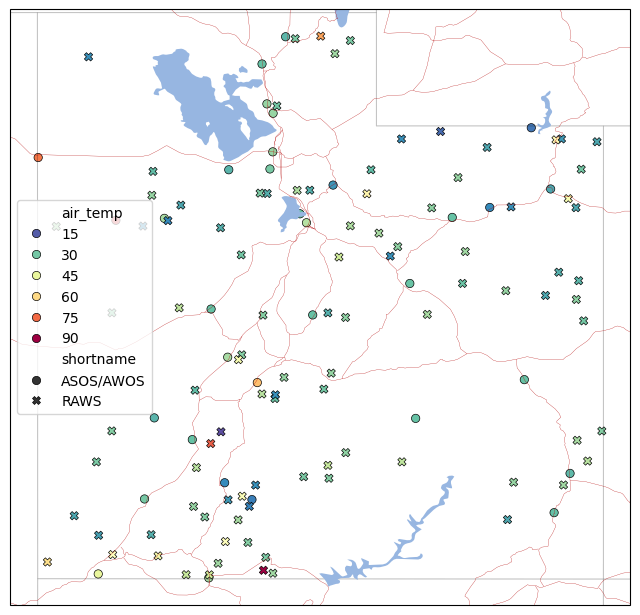

In [16]:
# Plot on a map

from herbie.toolbox import EasyMap, ccrs, pc

ax = EasyMap("10m", figsize=(8, 8)).STATES().LAKES().ROADS().ax
art = sns.scatterplot(
    df.filter(pl.col("longitude") < -60),  # One station has bad longitude metadata
    ax=ax,
    x="longitude",
    y="latitude",
    hue="air_temp",
    style="shortname",
    edgecolor="k",
    palette="Spectral_r",
)